<img width="150" src="http://lettres.sorbonne-universite.fr/sites/default/files/media/2019-10/sorbonne-lettre_1.svg"/>
<h1> Loi de Zipf - Analyse de Brown Corpus </h1>
<h2>UFR de sociologie et d'informatique pour les sciences humaines</h2>
<h3>Programmation de Modèles Linguistiques (I)</h3> 

<h4>Carlos González et Gaël Lejeune</h4>

    

<h3><font color = 'red'>Installation de nltk si ce n'est pas déjà le cas</font></h3>

https://www.nltk.org/install.html

In [ ]:
! pip install nltk --user

<h3><font color = 'blue'>Chargement de bibliothèques</font></h3>

In [10]:
from nltk.corpus import brown#erreur le 12/10/2023 suggère les deux lignes suivantes 
#import nltk #suggestion
#nltk.download('brown')#suggestion
from functools import reduce
import matplotlib.pyplot as pyplot
import re

<h3><font color = 'blue'>Définition des fonctions</font></h3>

In [11]:
def load_brown_corpus():
    p = re.compile('\W')    
    texte = [token.lower() for token in brown.words()]
    texte = [token for token in texte if not p.match(token)]

    return texte
    
    
def texte_to_dict(texte):
    texte_dict = {}
    
    for token in texte:
        if token in texte_dict:
            texte_dict[token] += 1
        else:
            texte_dict[token] = 1

    return texte_dict


def dict_to_list(texte_dict):
    texte_list=[]

    for mot in texte_dict.keys():
        texte_list.append([texte_dict[mot], mot])    

    texte_list.sort(reverse=True)
    return texte_list


def afficher_n(texte_list, n):
    
    cumul = 0
    print("rang\tmot\tfrequence\tfrequence(Zipf)")    
    print("-"*50)
    for _ in range(n):
        cumul += texte_list[_][0]
        print("{}\t{}\t{}\t\t{:.0f}".format(_+1, texte_list[_][1], texte_list[_][0], texte_list[0][0]/(_+1)))
    
    total = reduce(lambda x, y: x+y, [_[0] for _ in texte_list])
    prop = cumul/total*100
    
    print("-"*50)
    print("Ces {} mots représentent le {:0.2f}% du corpus".format(n, prop))

    
def plot_zipf(texte_list, log=False):
    pyplot.rcParams['figure.figsize'] = [15, 10]

    y = [_[0] for _ in texte_list]

    y_ = []
    for _ in range(len(texte_list)):
        y_.append(int(texte_list[0][0]/(_+1)))    

    pyplot.plot(y, "-", label="Réelle")
    pyplot.plot(y_, "--", label="Approximation (Zipf)") 
    
    if log:
        pyplot.yscale("log")
        pyplot.xscale("log")     
      
    pyplot.legend()
    pyplot.title("Loi de Zipf (Brown Corpus)")
    pyplot.xlabel("Rang")
    pyplot.ylabel("Fréquence")
    pyplot.show()    
        

<h3><font color = 'blue'>Analyse du corpus</font></h3>

In [12]:
texte = load_brown_corpus()
print("Quantité des mots (tokens) :", len(texte))
print("Quantité des mots differentes (types) :", len(set(texte)))

Quantité des mots (tokens) : 1012528
Quantité des mots differentes (types) : 49398


In [13]:
print(texte[:50])

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', 'no', 'evidence', 'that', 'any', 'irregularities', 'took', 'place', 'the', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'city', 'executive', 'committee', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of']


In [14]:
texte_dict = texte_to_dict(texte)

In [15]:
mots = ["the", "of", "and", "i"]
print("mot\tfrequence")
for mot in mots:
    print("{}\t{}".format(mot, texte_dict[mot]))

mot	frequence
the	69971
of	36412
and	28853
i	5164


In [13]:
texte_list = dict_to_list(texte_dict)

In [14]:
afficher_n(texte_list, 15)

rang	mot	frequence	frequence(Zipf)
--------------------------------------------------
1	the	69971		69971
2	of	36412		34986
3	and	28853		23324
4	to	26158		17493
5	a	23195		13994
6	in	21337		11662
7	that	10594		9996
8	is	10109		8746
9	was	9815		7775
10	he	9548		6997
11	for	9489		6361
12	it	8760		5831
13	with	7289		5382
14	as	7253		4998
15	his	6996		4665
--------------------------------------------------
Ces 15 mots représentent le 28.22% du corpus


## Compléter la cellule suivante pour afficher la courbe Zipf, et commenté les résultats

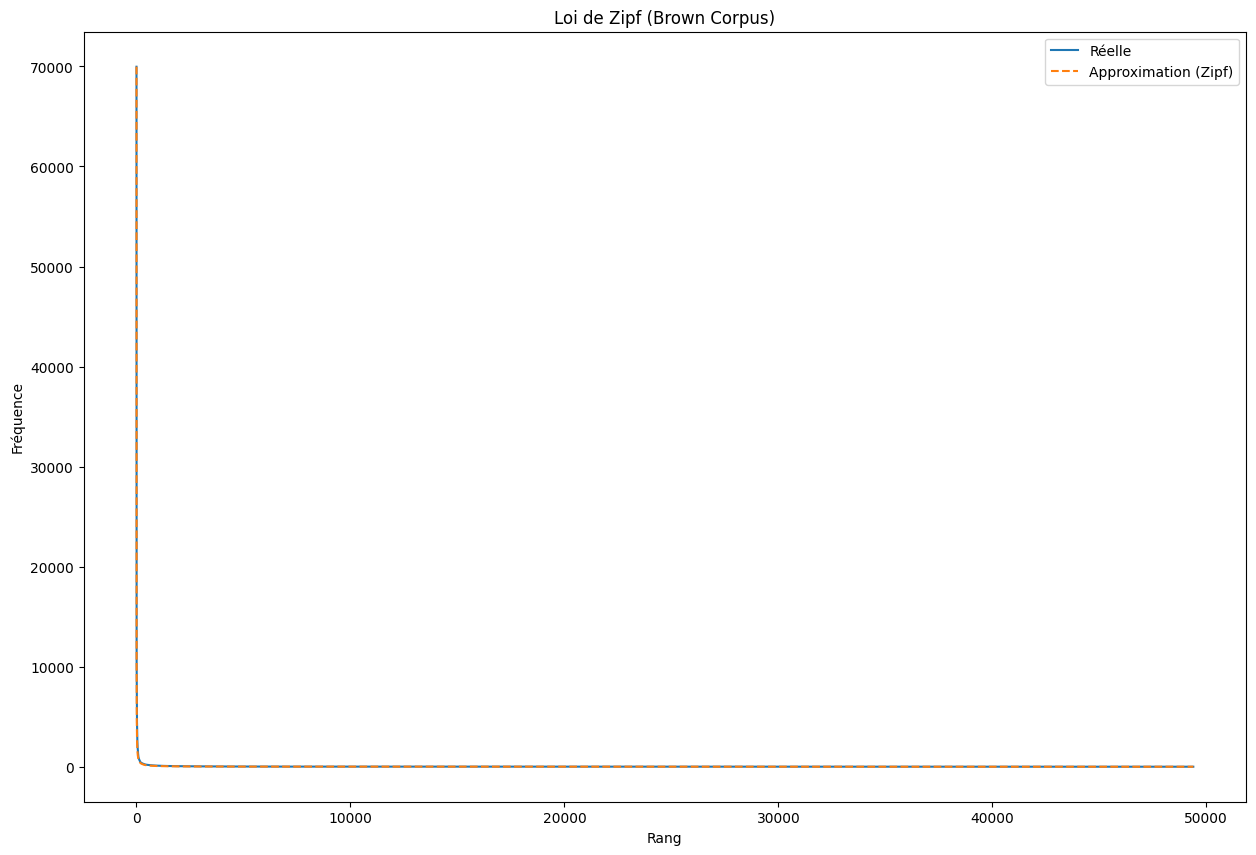

In [20]:
plot_zipf(texte_list[:], log=False)